# Census Income Project

# Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [3]:
#Importing important Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the Dataset with Pandas:
# Reading the csv file from dataset
CI=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [5]:
CI

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [6]:
CI.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
CI.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
# Dropping the irrelevant column Capital_loss
CI.drop("Capital_loss",axis=1, inplace=True)

In [9]:
# Dropping the irrelevant column Capital_gain
CI.drop("Capital_gain",axis=1, inplace=True)

In [10]:
CI.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
21297,25,Private,232914,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Black,Female,38,United-States,<=50K
12823,36,Private,257691,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,20,United-States,<=50K
2169,38,Private,277347,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,<=50K
6630,57,Private,182677,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,40,South,<=50K
22724,23,Private,216811,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,16,United-States,<=50K


In [11]:
# Checking the dimension of the dataset
CI.shape

(32560, 13)

In [12]:
CI.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [13]:
# To get good overview of the dataset
CI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Hours_per_week  32560 non-null  int64 
 11  Native_country  32560 non-null  object
 12  Income          32560 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


we have 9 categeorical variables in the dataset Date type region

In [14]:
# Checking the types of the dataset
CI.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [15]:
#checking for null values
CI.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

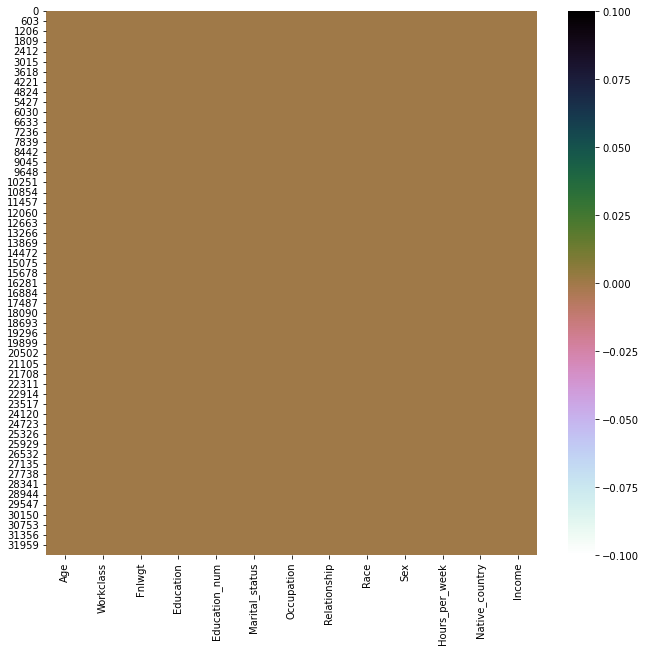

In [16]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(CI.isna(), cmap='cubehelix_r')

NOW THERE IS NO NULL VALUE LEFT IN THE DATASET BECAUSE WE HAD ALREADY DROPPED THOSE COLUMNS

In [17]:
CI.nunique()#unique elements in each column

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Getting the basic summary and statistical information of the data.

In [18]:
CI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Hours_per_week  32560 non-null  int64 
 11  Native_country  32560 non-null  object
 12  Income          32560 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [19]:
CI.dtypes[CI.dtypes == 'object'] #Identifying the Categorical Columns

Workclass         object
Education         object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

In [20]:
CI.dtypes[CI.dtypes != 'object']#Identifying the Continuous/discrete Columns

Age               int64
Fnlwgt            int64
Education_num     int64
Hours_per_week    int64
dtype: object

# Statistical description of dataset

In [21]:
CI.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


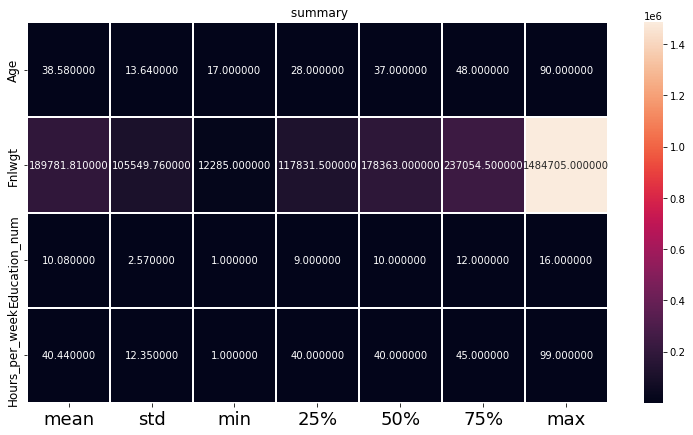

In [22]:
plt.figure(figsize=(13,7))
sns.heatmap(round(CI.describe()[1:].transpose(),2), linewidth =2, fmt='f', annot=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title(' summary')
plt.show()


# Exploratory Data Analysis

In [23]:
#UNIVARIATE ANALYSIS
CI['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

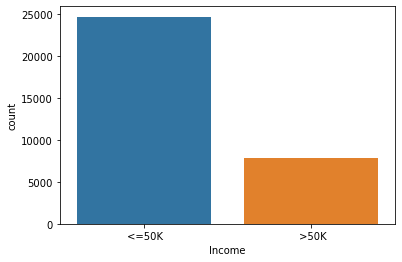

In [24]:
sns.countplot(CI.Income)

<Figure size 1296x648 with 0 Axes>

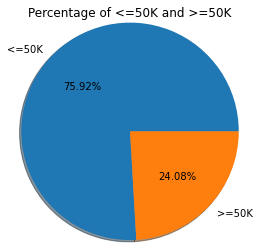

In [25]:
#using the Pie-chart for better understanding
labels = '<=50K','>=50K'
plt.figure(figsize=(18,9))
fig, ax = plt.subplots()
ax.pie(CI['Income'].value_counts(),labels = labels,radius =1.25,autopct = '%1.2f%%', shadow=True,)
plt.title('Percentage of <=50K and >=50K')
plt.show()

In [26]:
#UNIVARIATE ANALYSIS
CI['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

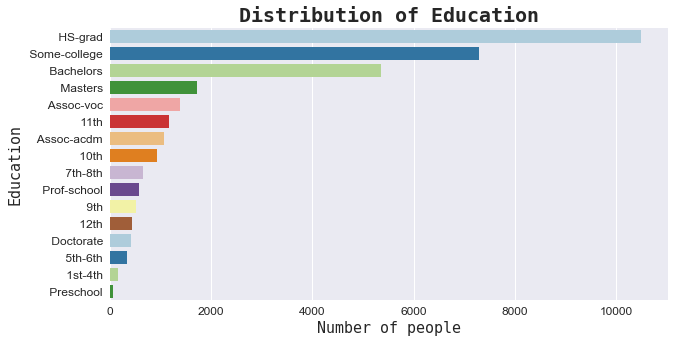

In [27]:
#UNIVARIATE ANALYSIS
# Creating a barplot for 'Education'

edu = CI['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


In [28]:
#UNIVARIATE ANALYSIS
CI['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

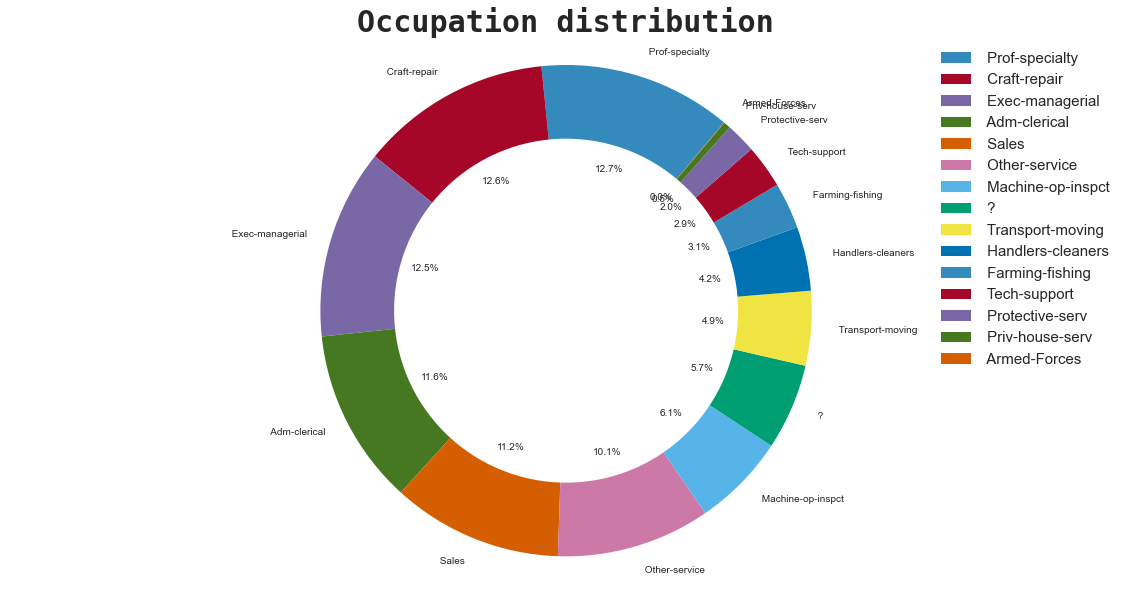

In [29]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'Occupation'
relation = CI['Occupation'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Occupation distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

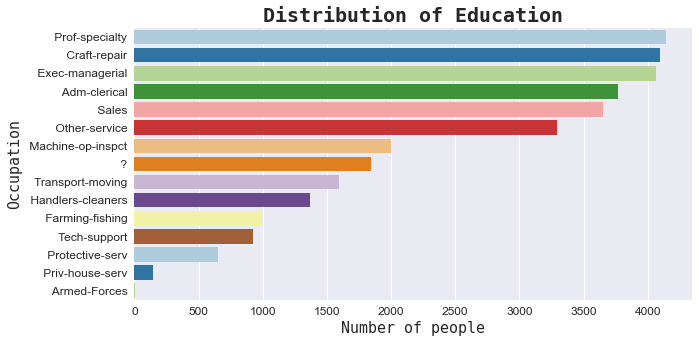

In [30]:
# Creating a barplot for 'Education'

edu = CI['Occupation'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Occupation', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


In [31]:
#UNIVARIATE ANALYSIS
CI['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

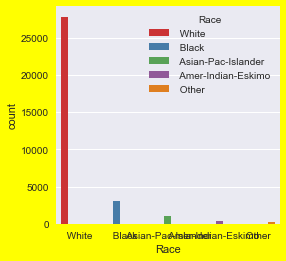

In [32]:
plt.figure(figsize=(4,4),facecolor='YELLOW')
sns.countplot(CI['Race'], hue=CI['Race'], palette='Set1')


<Figure size 1296x648 with 0 Axes>

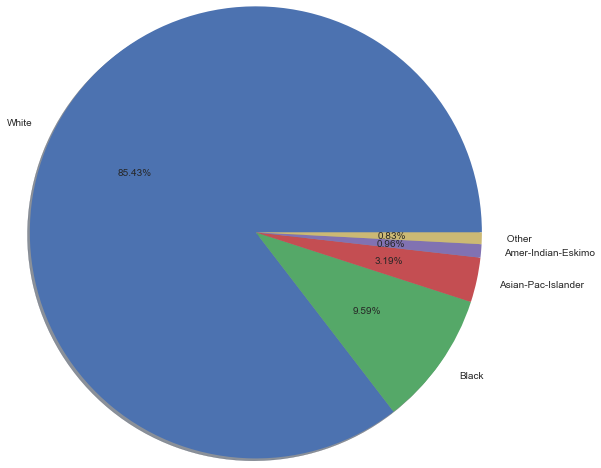

In [33]:
#using the Pie-chart for better understanding
labels = 'White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo',' Other'
plt.figure(figsize=(18,9))
fig, ax = plt.subplots()
ax.pie(CI['Race'].value_counts(),labels = labels,radius =1.89,autopct = '%1.2f%%', shadow=True,)

plt.show()

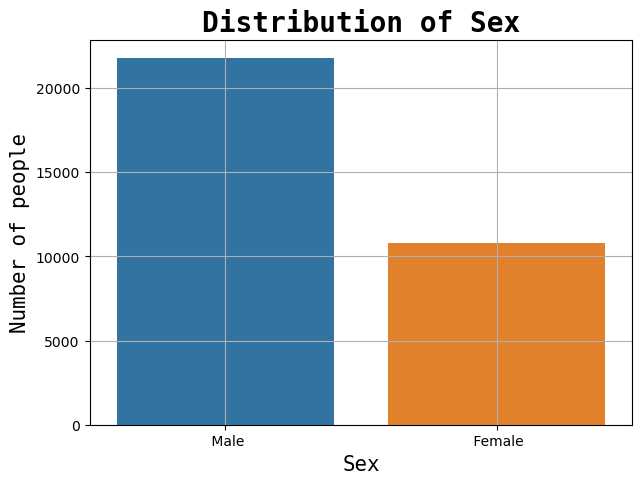

In [34]:
# Creating a barplot for 'Sex'
sex = CI['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

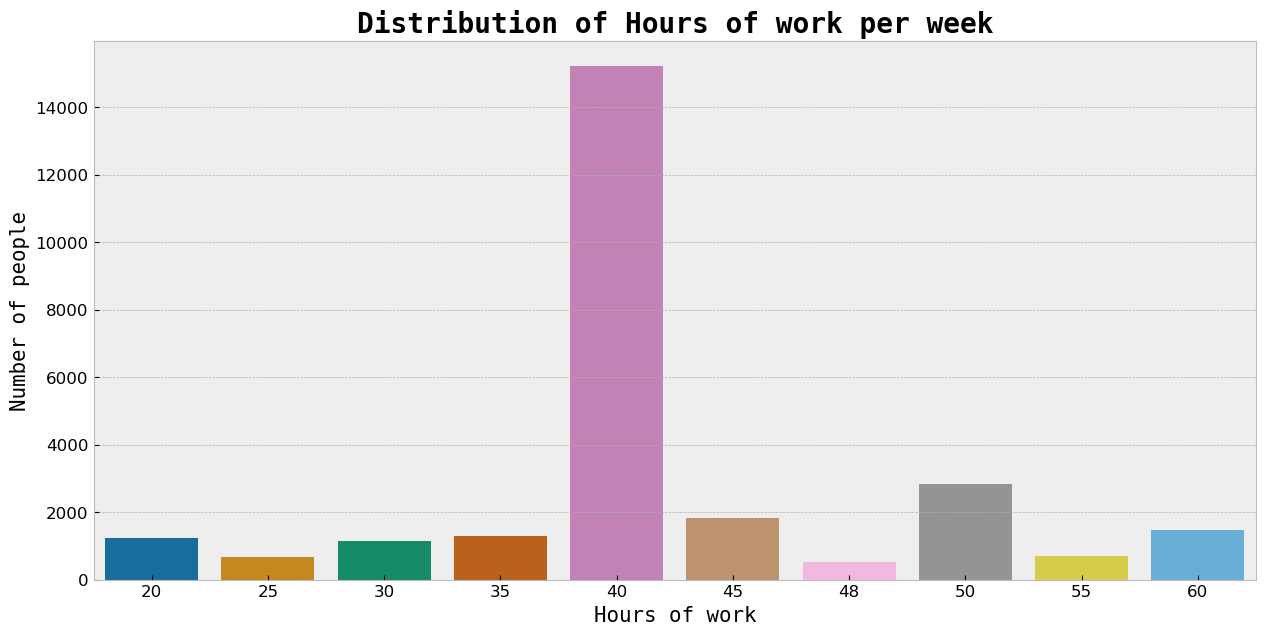

In [35]:
# Creating a barplot for 'Hours per week'
hours = CI['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# Bivariate Analysis

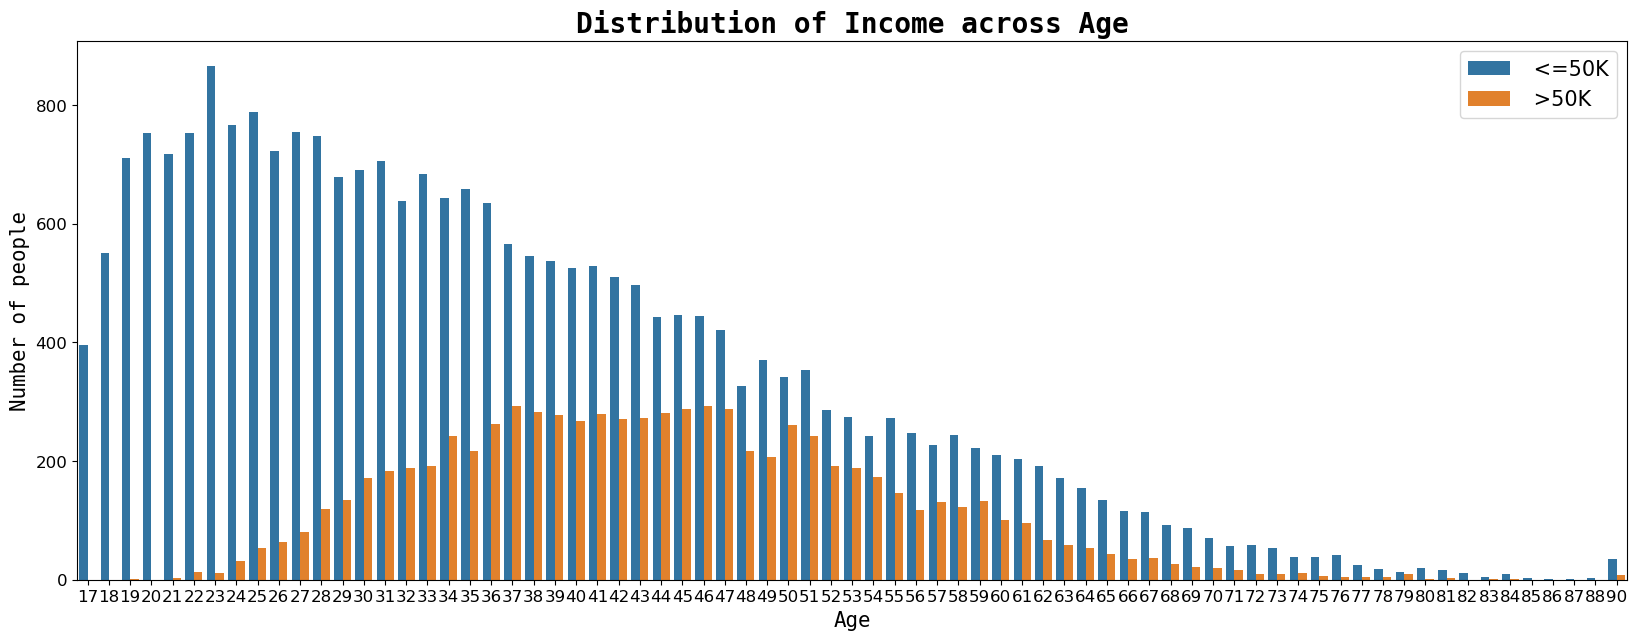

In [36]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(CI['Age'], hue=CI['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

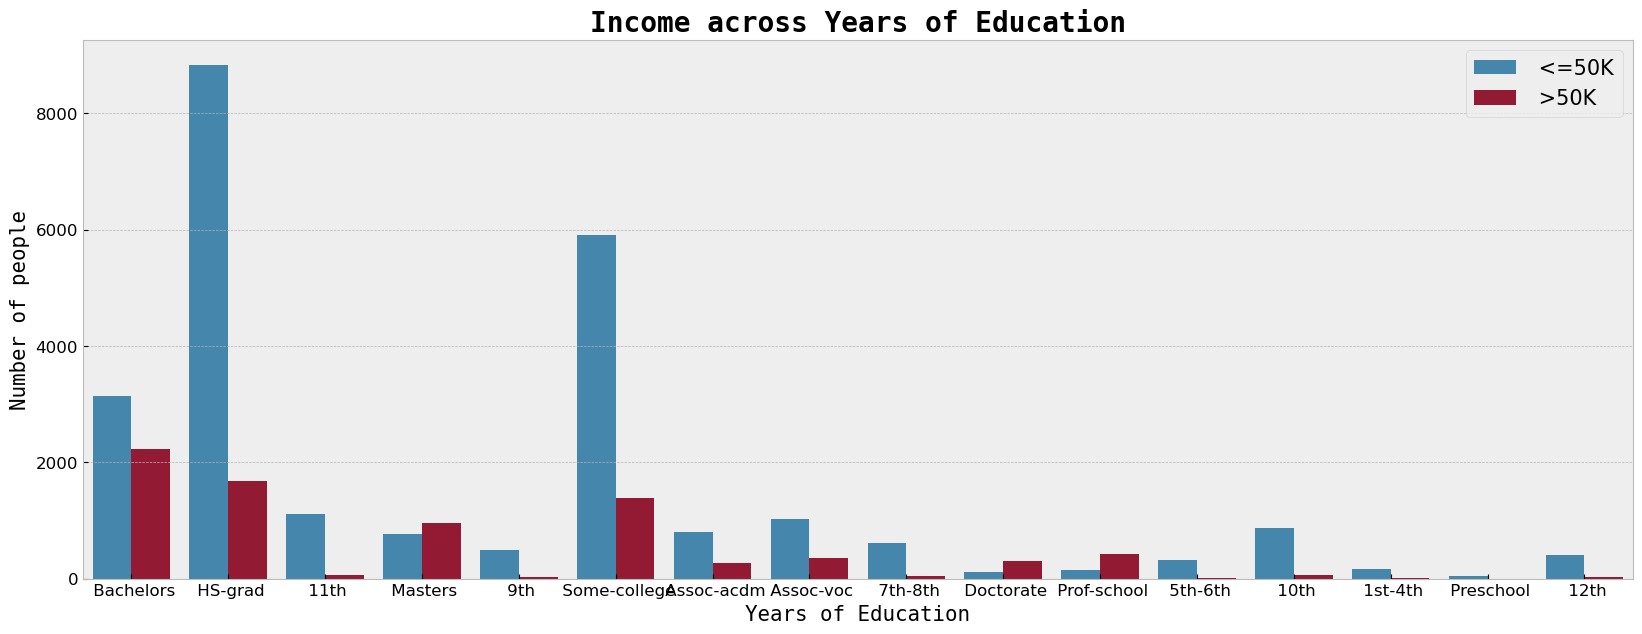

In [37]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(CI['Education'],
              hue=CI['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

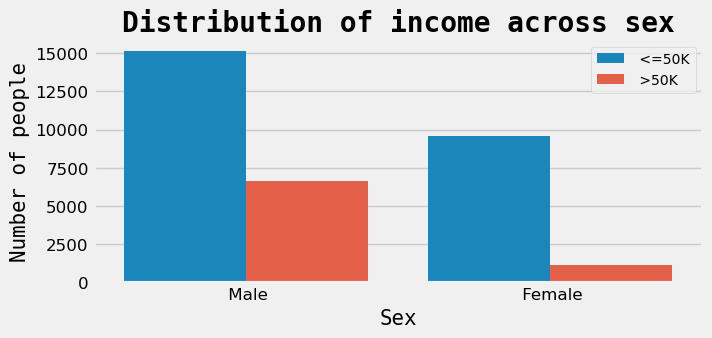

In [38]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(CI['Sex'], hue=CI['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})

plt.show()

# Multivariate Analysis

# Encoding using the Ordinal encoder

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
CI['Income'] = le.fit_transform(CI['Income'])

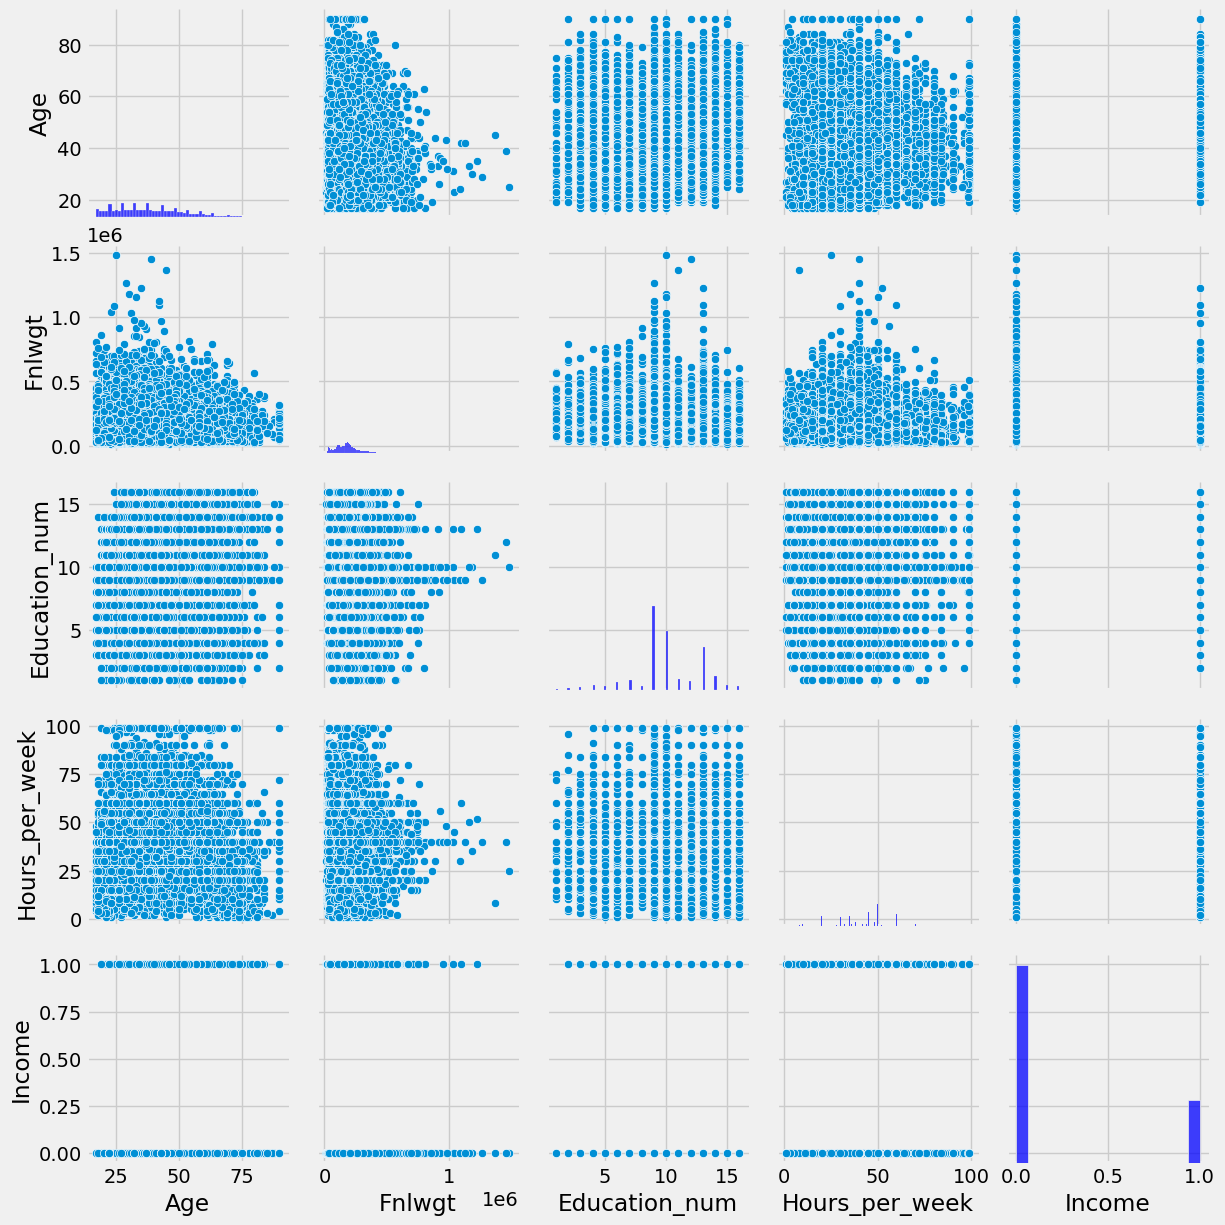

In [41]:
# Creating a pairplot of dataset
sns.pairplot(CI)
plt.savefig('multi1.png')
plt.show()

In [42]:
#Encoding using the Ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
CI["Workclass"] = ord_enc.fit_transform(CI[["Workclass"]])
CI["Education"] = ord_enc.fit_transform(CI[["Education"]])
CI["Marital_status"] = ord_enc.fit_transform(CI[["Marital_status"]])
CI["Occupation"] = ord_enc.fit_transform(CI[["Occupation"]])
CI["Relationship "] = ord_enc.fit_transform(CI[["Relationship"]])
CI["Race"] = ord_enc.fit_transform(CI[["Race"]])
CI["Sex"] = ord_enc.fit_transform(CI[["Sex"]])


CI.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Relationship
0,50,6.0,83311,9.0,13,2.0,4.0,Husband,4.0,1.0,13,United-States,0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,Not-in-family,4.0,1.0,40,United-States,0,1.0
2,53,4.0,234721,1.0,7,2.0,6.0,Husband,2.0,1.0,40,United-States,0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,Wife,2.0,0.0,40,Cuba,0,5.0
4,37,4.0,284582,12.0,14,2.0,4.0,Wife,4.0,0.0,40,United-States,0,5.0


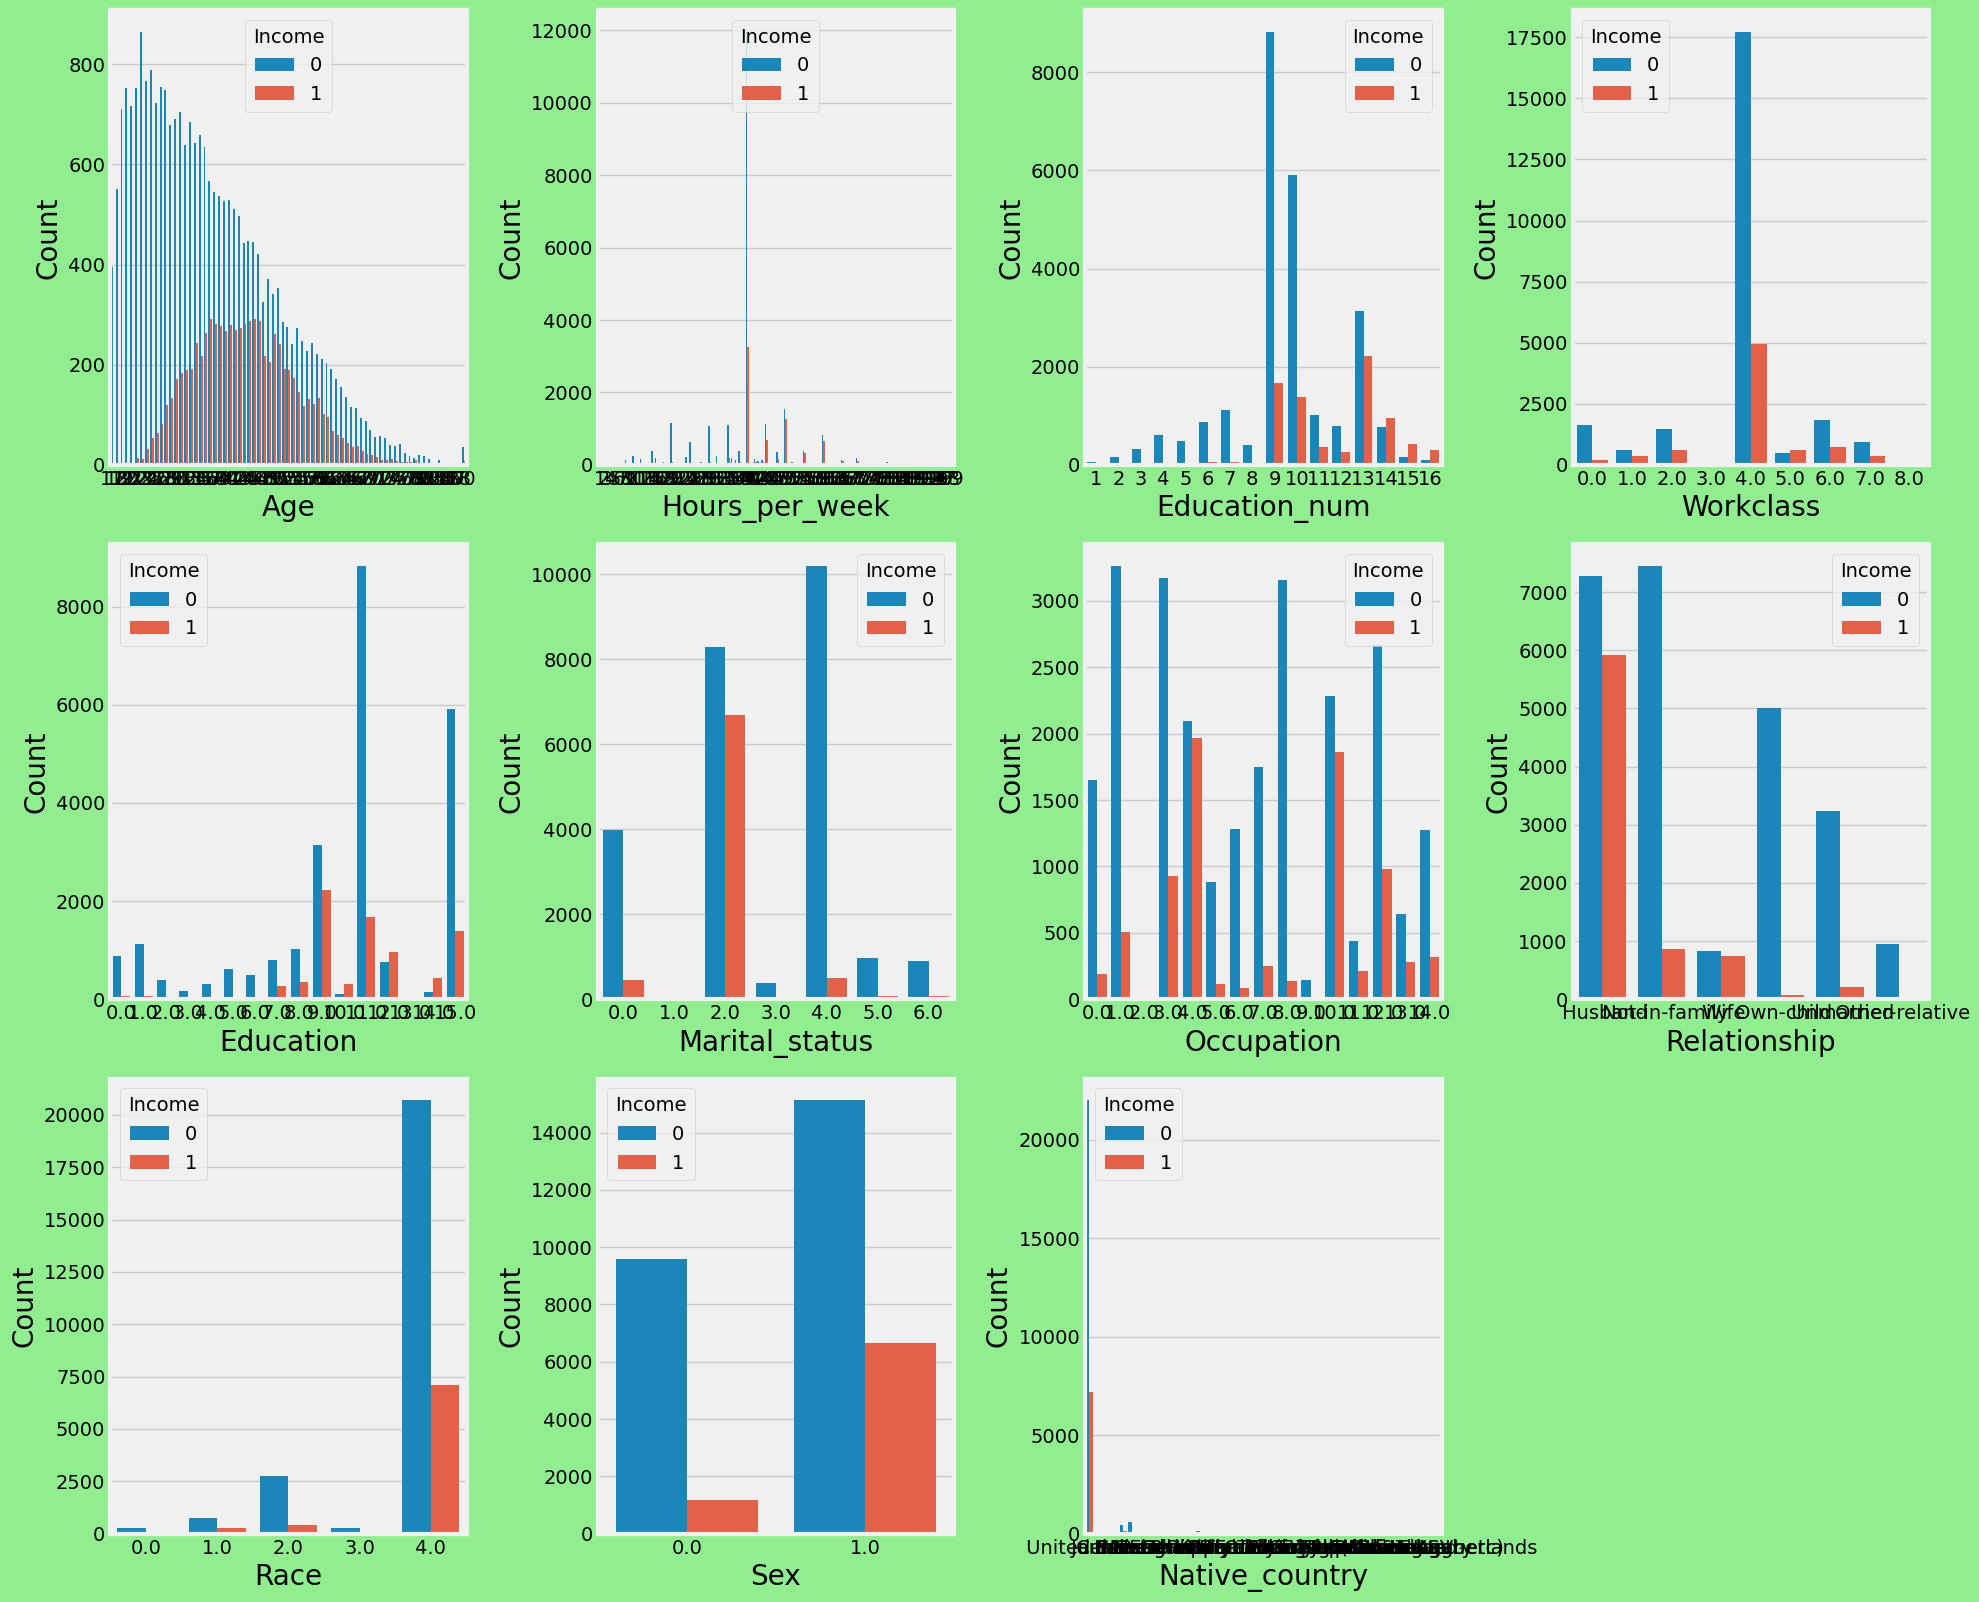

In [43]:
plt.figure(figsize=(20,21),facecolor='lightgreen')
plotnum=1
X = CI[['Age','Hours_per_week','Education_num','Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']]
y = CI['Income']
for col in X:
    if plotnum<=25:
        plt.subplot(4,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

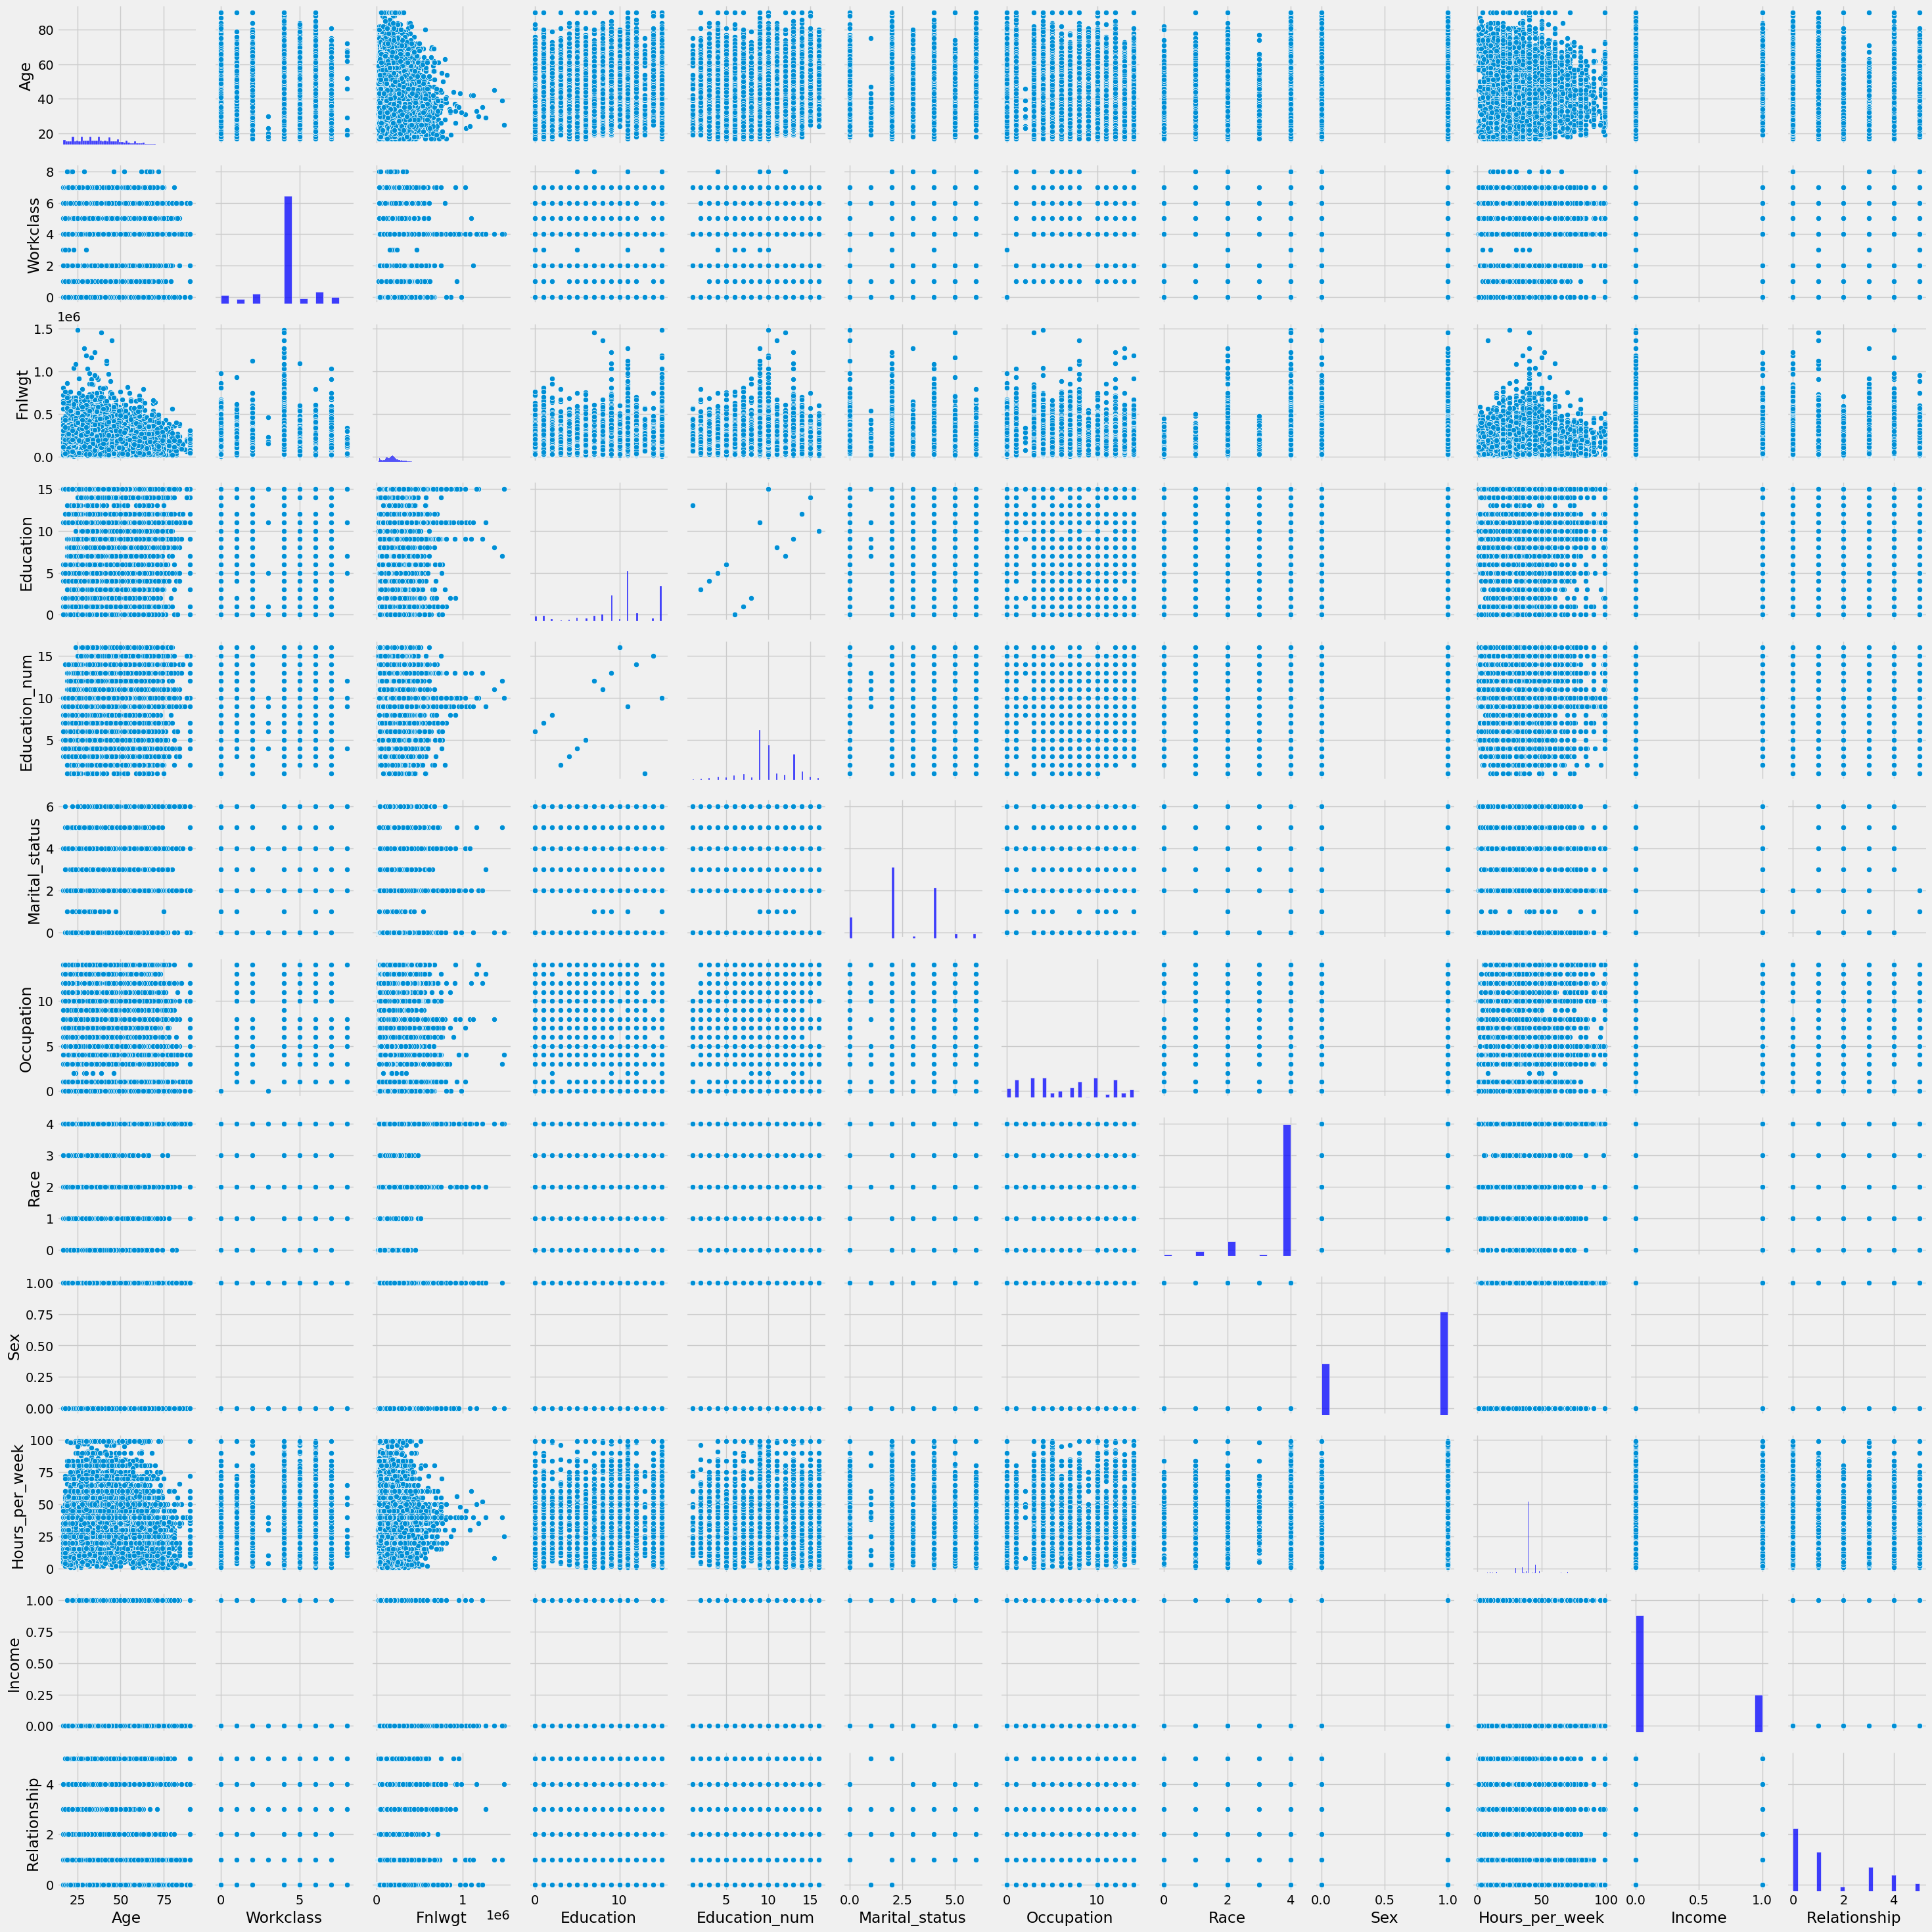

In [44]:
sns.pairplot(CI,palette='Set9')

# OUTLIERS

<AxesSubplot:>

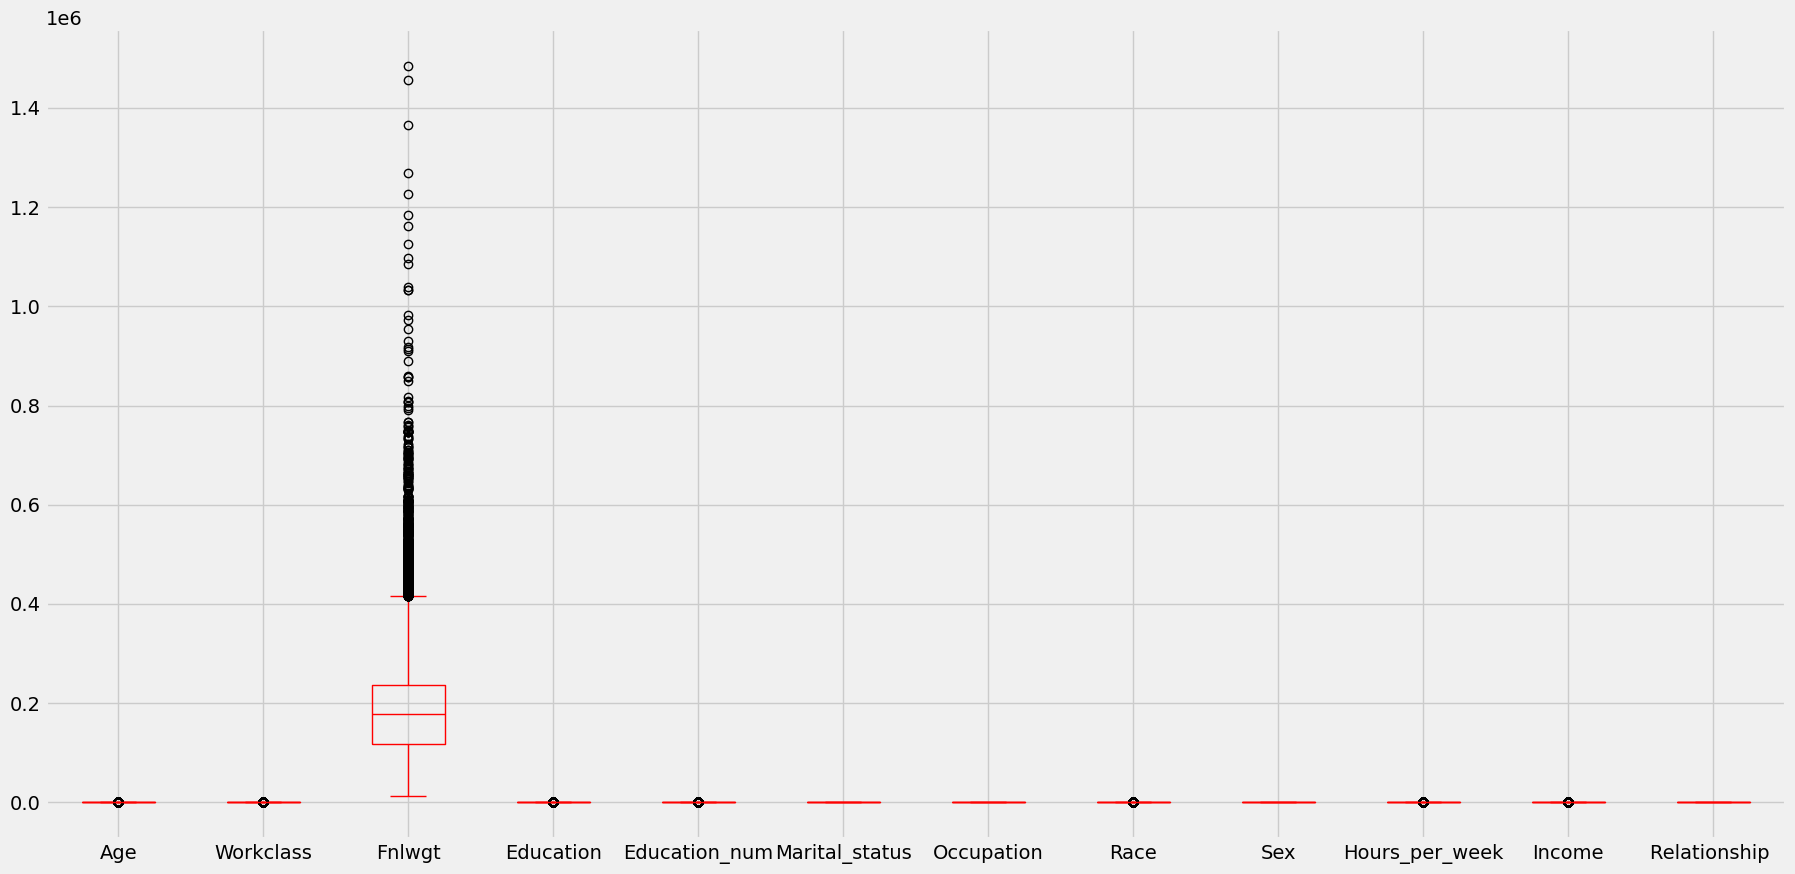

In [45]:
CI.plot(kind="box", figsize = (20,10), color="r")

# Correlation Analysis

In [46]:
CI.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Income,Relationship
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,0.028718,0.088832,0.068756,0.234039,-0.263698
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,0.049720,0.095942,0.138974,0.051645,-0.090449
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,-0.021278,0.026882,-0.018770,-0.009481,0.008922
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,0.014135,-0.027349,0.055510,0.079311,-0.010879
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,0.031825,0.012256,0.148127,0.335182,-0.094145
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,-0.068025,-0.129337,-0.190521,-0.199295,0.185461
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,0.006779,0.080328,0.080384,0.075448,-0.075620
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,1.000000,0.087197,0.041910,0.071853,-0.116052
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,0.087197,1.000000,0.229312,0.215995,-0.582453
Hours_per_week,0.068756,0.138974,-0.018770,0.055510,0.148127,-0.190521,0.080384,0.041910,0.229312,1.000000,0.229690,-0.248975


Text(0.5, 1.0, 'Correlation matrix')

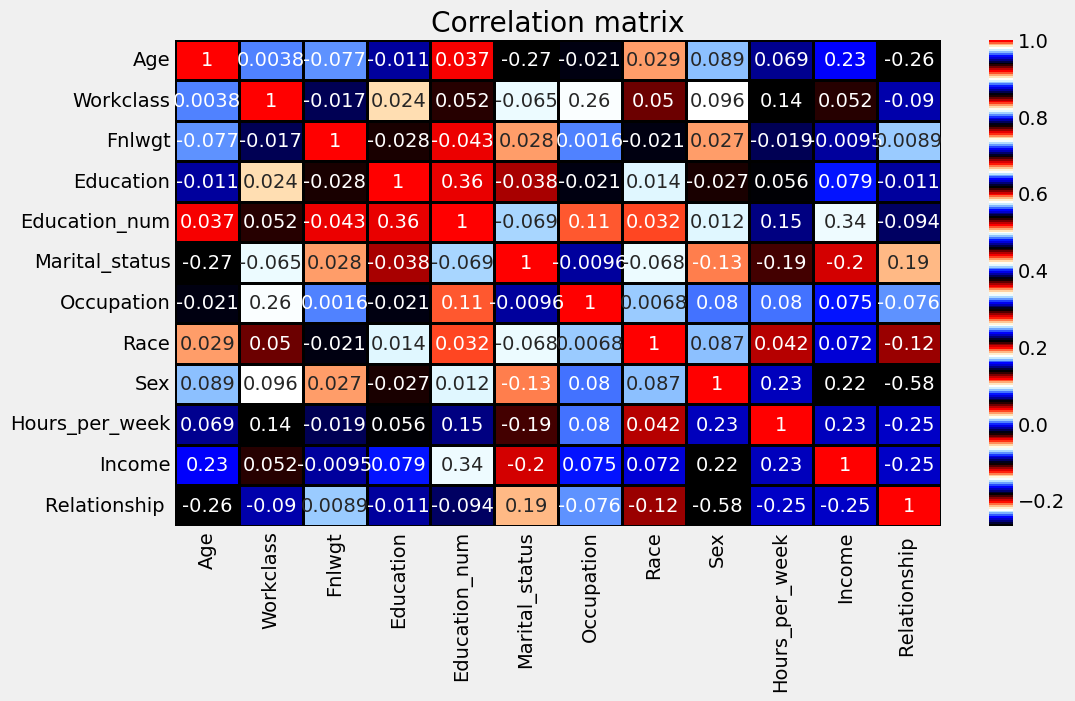

In [47]:
#Correalation using the Heatmap
plt.figure(figsize=(11,6))
sns.heatmap(CI.corr(), annot =True, cmap='flag_r' , linecolor='black', linewidth=1,  robust=True)
plt.title('Correlation matrix')

# Checking for the Skewness

In [48]:
CI.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Income            1.212383
Relationship      0.786784
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

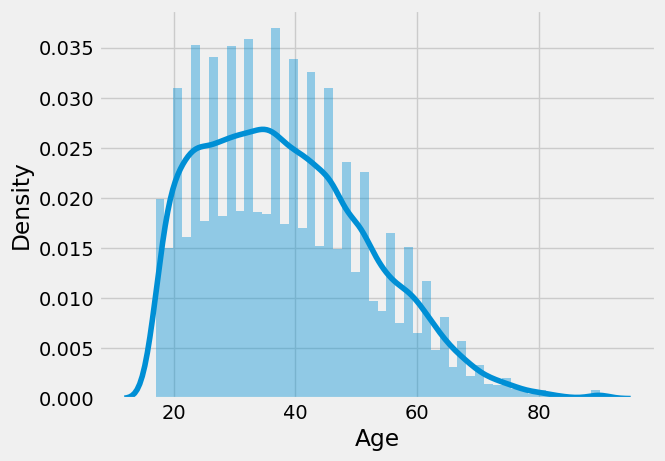

In [49]:
sns.distplot(CI['Age'])

<AxesSubplot:xlabel='Workclass', ylabel='Density'>

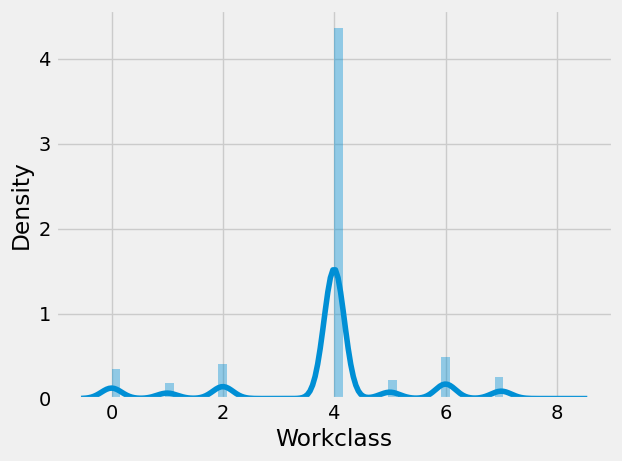

In [50]:
sns.distplot(CI['Workclass'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

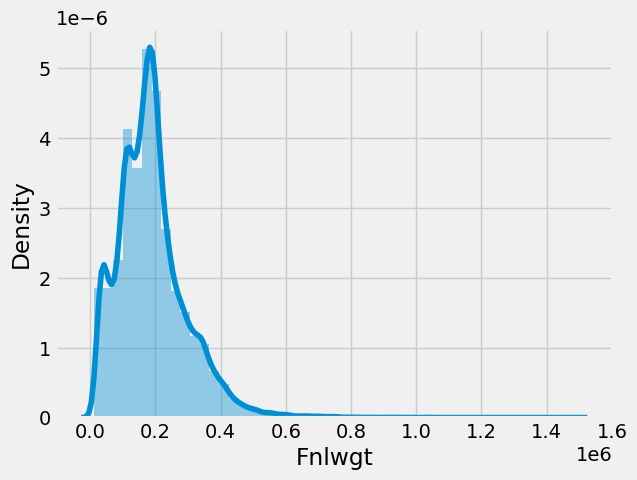

In [51]:
sns.distplot(CI['Fnlwgt'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

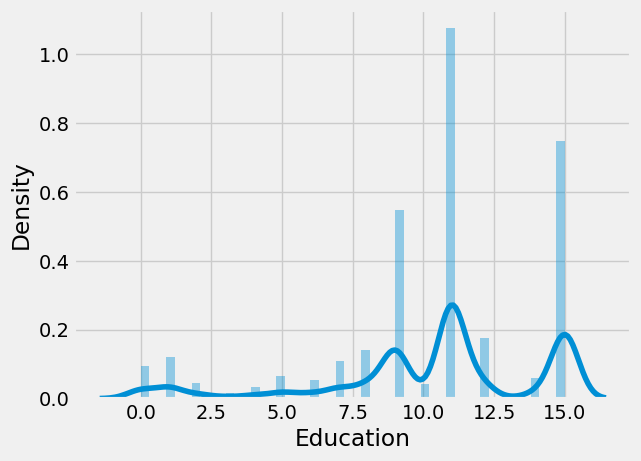

In [52]:
sns.distplot(CI['Education'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

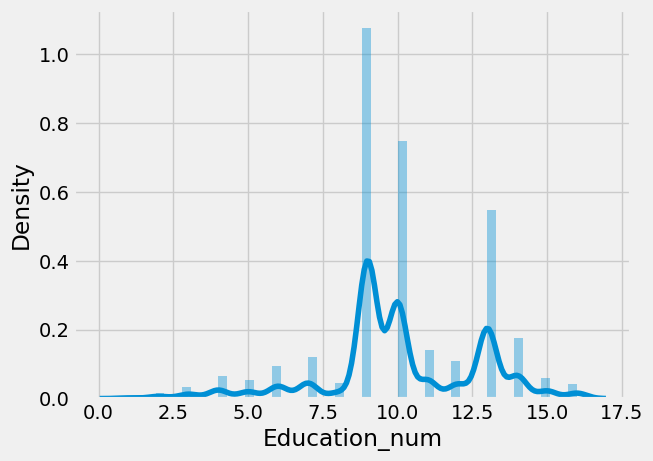

In [53]:
sns.distplot(CI['Education_num'])

<AxesSubplot:xlabel='Marital_status', ylabel='Density'>

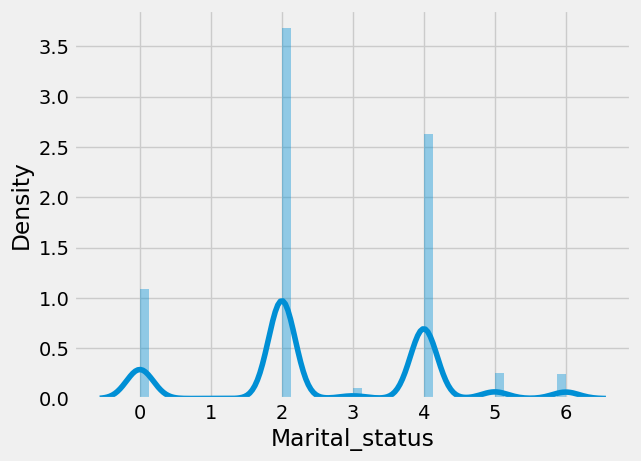

In [54]:
sns.distplot(CI['Marital_status'])

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

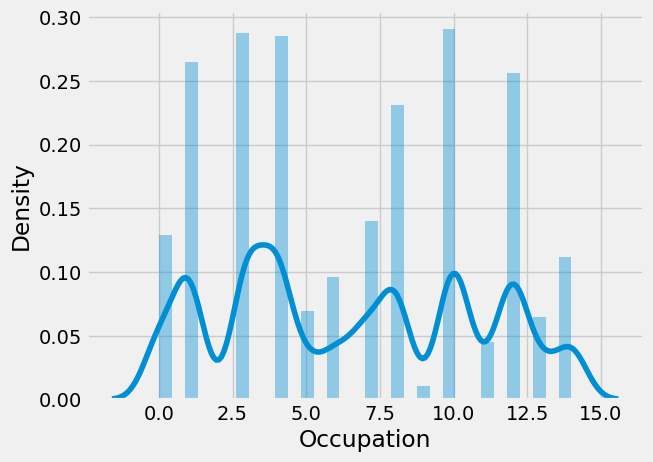

In [55]:
sns.distplot(CI['Occupation'])

<AxesSubplot:xlabel='Race', ylabel='Density'>

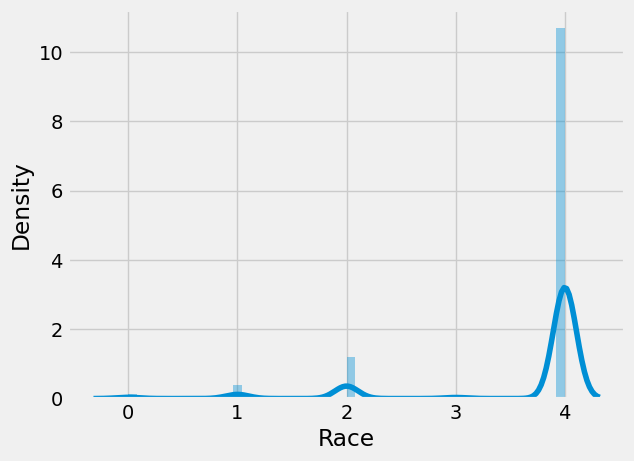

In [56]:
sns.distplot(CI['Race'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

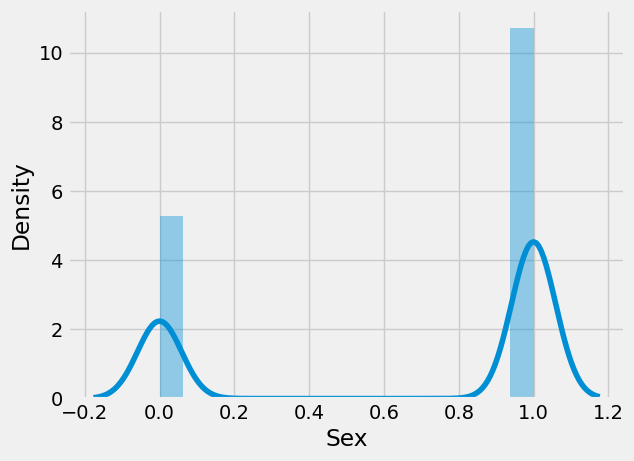

In [57]:
sns.distplot(CI['Sex'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

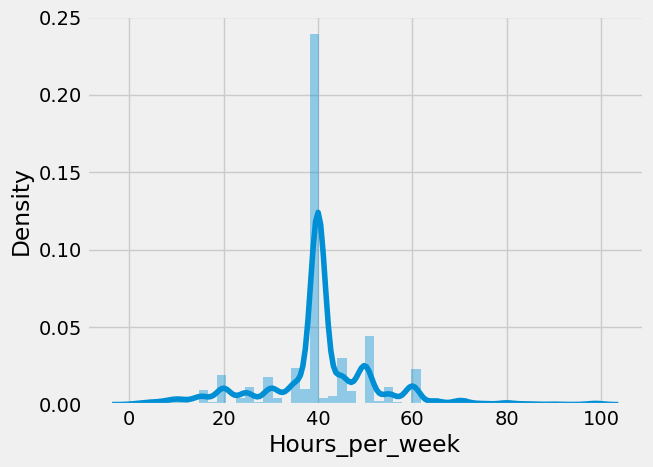

In [58]:
sns.distplot(CI['Hours_per_week'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

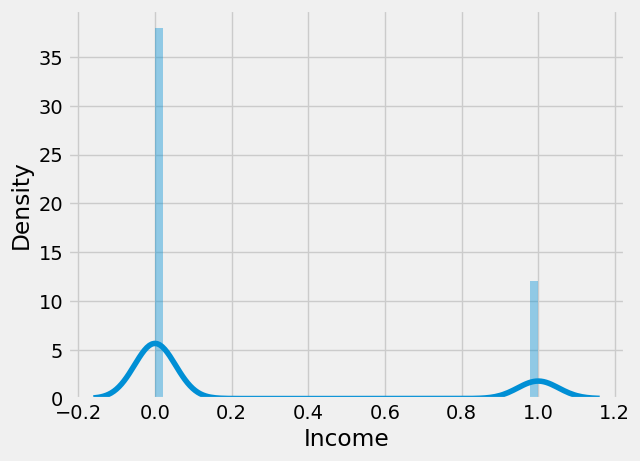

In [59]:
sns.distplot(CI['Income'])

# Removing outliers

# 1. Zscore method

In [60]:
CI.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income', 'Relationship '],
      dtype='object')

In [61]:
variables = CI[["Fnlwgt"]]

In [62]:
# Using zscore to remove outliers in the feature Fnlwgt 
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_CI=CI[(z<3).all(axis=1)]
new_CI

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Relationship
0,50,6.0,83311,9.0,13,2.0,4.0,Husband,4.0,1.0,13,United-States,0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,Not-in-family,4.0,1.0,40,United-States,0,1.0
2,53,4.0,234721,1.0,7,2.0,6.0,Husband,2.0,1.0,40,United-States,0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,Wife,2.0,0.0,40,Cuba,0,5.0
4,37,4.0,284582,12.0,14,2.0,4.0,Wife,4.0,0.0,40,United-States,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,Wife,4.0,0.0,38,United-States,0,5.0
32556,40,4.0,154374,11.0,9,2.0,7.0,Husband,4.0,1.0,40,United-States,1,0.0
32557,58,4.0,151910,11.0,9,6.0,1.0,Unmarried,4.0,0.0,40,United-States,0,4.0
32558,22,4.0,201490,11.0,9,4.0,1.0,Own-child,4.0,1.0,20,United-States,0,3.0


In [63]:
CI.shape

(32560, 14)

In [64]:
new_CI.shape

(32213, 14)

In [65]:
# Let's check the the data loss
data_loss = (32560-32213)/32560*100
data_loss

1.0657248157248156

# 2. IQR (Inter Quantile Range) method

In [66]:
# 1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

# IQR
IQR=Q3 - Q1

CI1=CI[~((CI < (Q1 - 1.5 * IQR)) |(CI > (Q3 + 1.5 * IQR))).any(axis=1)]

In [67]:
CI.shape

(32560, 14)

In [68]:
CI1.shape

(31568, 14)

In [69]:
# Let's check the the data loss
data_loss = (32560-31568)/32560*100
data_loss

3.0466830466830466

In [70]:
# Checking the skewness
new_CI.skew()

Age               0.556157
Workclass        -0.751643
Fnlwgt            0.632416
Education        -0.934420
Education_num    -0.308440
Marital_status   -0.011566
Occupation        0.112795
Race             -2.456135
Sex              -0.717935
Hours_per_week    0.226888
Income            1.211676
Relationship      0.788113
dtype: float64

# Splitting the data into X and y¶

In [71]:
x = new_CI.drop(['Income'], axis=1)
y =new_CI.iloc[:,-1]

In [72]:
x.shape

(32213, 13)

In [73]:
y.shape

(32213,)

In [74]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Relationship
0,50,6.0,83311,9.0,13,2.0,4.0,Husband,4.0,1.0,13,United-States,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,Not-in-family,4.0,1.0,40,United-States,1.0
2,53,4.0,234721,1.0,7,2.0,6.0,Husband,2.0,1.0,40,United-States,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,Wife,2.0,0.0,40,Cuba,5.0
4,37,4.0,284582,12.0,14,2.0,4.0,Wife,4.0,0.0,40,United-States,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,Wife,4.0,0.0,38,United-States,5.0
32556,40,4.0,154374,11.0,9,2.0,7.0,Husband,4.0,1.0,40,United-States,0.0
32557,58,4.0,151910,11.0,9,6.0,1.0,Unmarried,4.0,0.0,40,United-States,4.0
32558,22,4.0,201490,11.0,9,4.0,1.0,Own-child,4.0,1.0,20,United-States,3.0


In [75]:
y

0        0.0
1        1.0
2        0.0
3        5.0
4        5.0
        ... 
32555    5.0
32556    0.0
32557    4.0
32558    3.0
32559    5.0
Name: Relationship , Length: 32213, dtype: float64